In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import streamlit as st
import joblib

In [2]:
train_data = pd.read_csv(r"C:\Users\Admin\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")
test_data = pd.read_csv(r"C:\Users\Admin\Downloads\Logistic Regression\Logistic Regression\Titanic_test.csv")

In [3]:
st.write(train_data.head())

2024-09-01 20:24:12.975 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [4]:
st.write(train_data.describe())

In [5]:
st.write(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


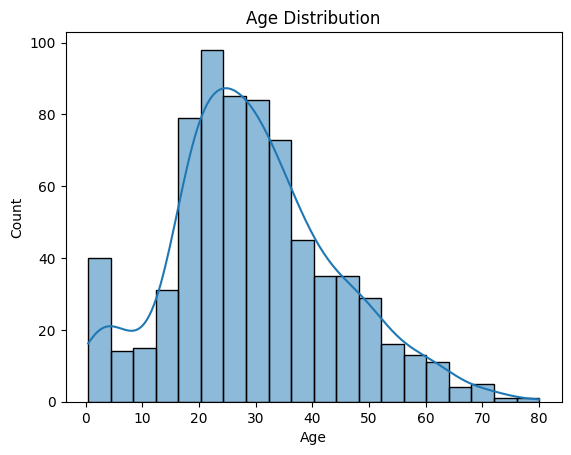

In [6]:
sns.histplot(train_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

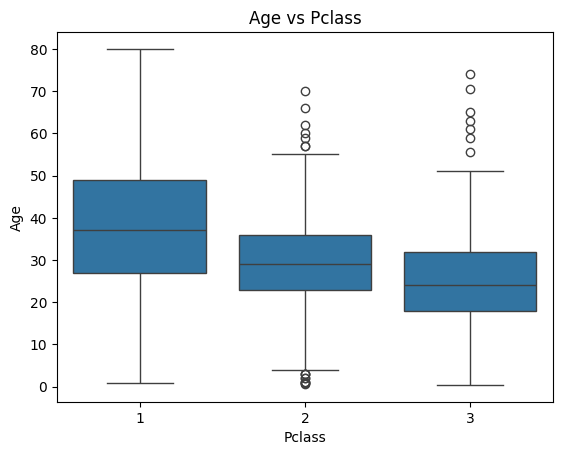

In [7]:
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.title('Age vs Pclass')
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


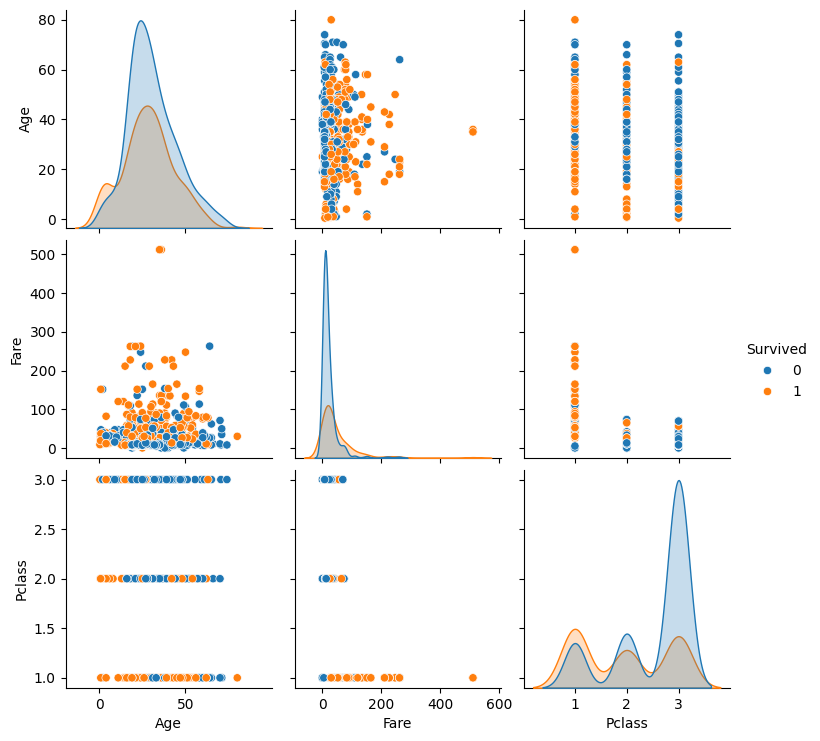

In [8]:
sns.pairplot(train_data[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()

In [9]:
imputer = SimpleImputer(strategy='mean')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])

In [10]:
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])


In [11]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [15]:
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
roc_auc = roc_auc_score(y_train, y_pred_train)

In [16]:
st.write(f'Accuracy: {accuracy:.2f}')
st.write(f'Precision: {precision:.2f}')
st.write(f'Recall: {recall:.2f}')
st.write(f'F1 Score: {f1:.2f}')
st.write(f'ROC AUC Score: {roc_auc:.2f}')

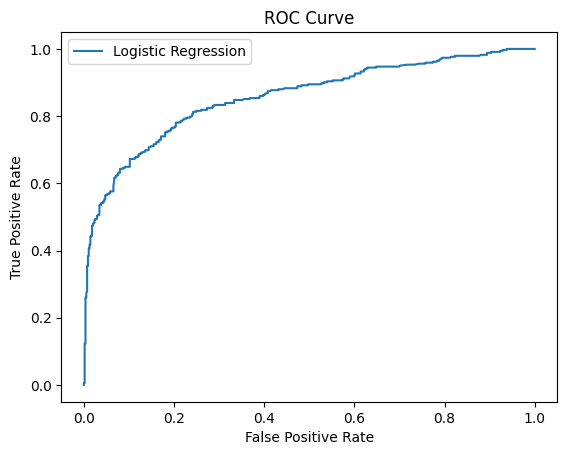

In [17]:
fpr, tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [18]:
st.write('Model Coefficients:')
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
st.write(coefficients)

In [19]:
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [20]:
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare):
    input_data = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare]])
    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)
    return prediction[0]

In [26]:

st.title('Titanic Survival Prediction')
Pclass = st.selectbox('Pclass', [1, 2, 3])
Sex = st.selectbox('Sex', ['male', 'female'])
Age = st.slider('Age', 0, 100, 30)
SibSp = st.slider('SibSp', 0, 10, 0)
Parch = st.slider('Parch', 0, 10, 0)
Fare = st.slider('Fare', 0.0, 100.0, 50.0)


In [27]:
if st.button('Predict'):
    result = predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare)
    st.write('Survived' if result == 1 else 'Did not survive')